In [ ]:
pip install -q optax dm-haiku

     |████████████████████████████████| 145 kB 4.7 MB/s 
     |████████████████████████████████| 350 kB 52.6 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


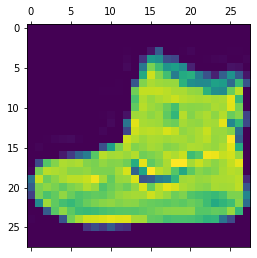

In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import jax
import haiku as hk
rng = jax.random.PRNGKey(0)

X = jnp.load('X.npy')
y = jnp.load('y.npy')

class_names = ['T-shirt/top',  # 0
               'Trouser',      # 1
               'Pullover',     # 2
               'Dress',        # 3
               'Coat',         # 4
               'Sandal',       # 5
               'Shirt',        # 6
               'Sneaker',      # 7
               'Bag',          # 8
               'Ankle boot']   # 9

plt.matshow(X[0].reshape(28, 28))
print(y[0])

In [3]:
def model(X):
    X = hk.Linear(128)(X)
    X = jax.nn.relu(X)

    X = hk.Linear(10)(X)
    X = jax.nn.softmax(X)
    return X


init, model = hk.without_apply_rng(hk.transform(model))
Θ = init(rng, X[0])

lr = 1e-3
optimizer = optax.adam
opt_state = optimizer(lr).init(Θ)


def L(Θ, X, y):
    from jax.scipy.special import xlogy
    prob = model(Θ, X)
    return -(xlogy(y, prob)).sum(-1).mean()


@jax.jit
def update(Θ, opt_state):
    grads = jax.grad(L)(Θ, X, y)
    updates, opt_state = optimizer(lr).update(grads, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ, opt_state


@jax.jit
def evaluation(Θ):
    P = model(Θ, X)
    prediction = jnp.argmax(P, axis=1)
    y_flat = jnp.argmax(y, axis=1)
    return (prediction == y_flat).mean()

In [4]:
for iteration in range(5000):
    Θ, opt_state = update(Θ, opt_state)

print(evaluation(Θ))

0.98726666
